## Executive Summary

This notebook demonstrates how to use the codes to download and preprocess COVID data of QC and create a map from it. Before proceeding to this notebook, make sure to have the shapefiles of the barangays and the file containing the total counts per day in Quezon City. One option to create the total counts per day is to aggregate the data (i.e., sum the counts across all barangays). However, for some unknown reason, there is a discrepancy between the counts from the aggregated data and the counts reported in their website so the total counts per day data was manually created.

## Import libraries

In [1]:
import sys
sys.path.append('../codes')

import utils
import glob
from PIL import Image
import moviepy.editor as mp

## Download data

Here, we download data from QC website (https://quezoncity.gov.ph/covid19counts/). The downloaded data will be saved into the specified directory.

In [2]:
start_dt = (2021, 4, 1) # starting date to extract data from
end_dt = (2021, 4, 3) # end date
output_dir = '/Users/ginoasuncion/Projects/mapping_covid_cases/data'

utils.download_data(start_dt, end_dt, directory=output_dir)

No data extracted on April 03, 2021


## Extract table from downloaded data

Table containing the data will be extracted from the pdf.

In [3]:
downloaded_file = '/Users/ginoasuncion/Projects/mapping_covid_cases/data/April-02-2021-Cases.pdf'

downloaded_data_df = utils.extract_table(downloaded_file)
downloaded_data_df.head(2)

,Barangay,Active,Died,Recovered,Total
1,Alicia,34,2,134,170
2,Bagong Pag‐Asa,155,17,395,567


## Preprocess data

Names of the barangays will be processed to match the barangay names specified in the shapefiles. This outputs a dataframe containing the downloaded data and the corresponding geometry data of the barangays.

In [4]:
shapefiles_location = '/Users/ginoasuncion/Projects/mapping_covid_cases/data/Barangays/Barangays.shp'

preprocessed_data = utils.preprocess(downloaded_data_df, shapefiles_location)
preprocessed_data.head(2)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,...,ENGTYPE_3,PROVINCE,REGION,geometry,coords,Barangay,Active,Died,Recovered,Total
0,177,PHL,Philippines,47,Metropolitan Manila,963,Quezon City,25622,Alicia,None,...,Village,Metropolitan Manila,Metropolitan Manila,"POLYGON ((121.01987 14.66056, 121.02048 14.660...","(121.022870574022, 14.660291194915771)",Alicia,34.0,2.0,134.0,170.0
1,177,PHL,Philippines,47,Metropolitan Manila,963,Quezon City,25623,Amihan,None,...,Village,Metropolitan Manila,Metropolitan Manila,"POLYGON ((121.06764 14.63267, 121.06762 14.632...","(121.0664841964197, 14.63163089752203)",Amihan,25.0,1.0,102.0,128.0


## Map active COVID-19 cases

This will create a map showing the number of active cases in Quezon City.

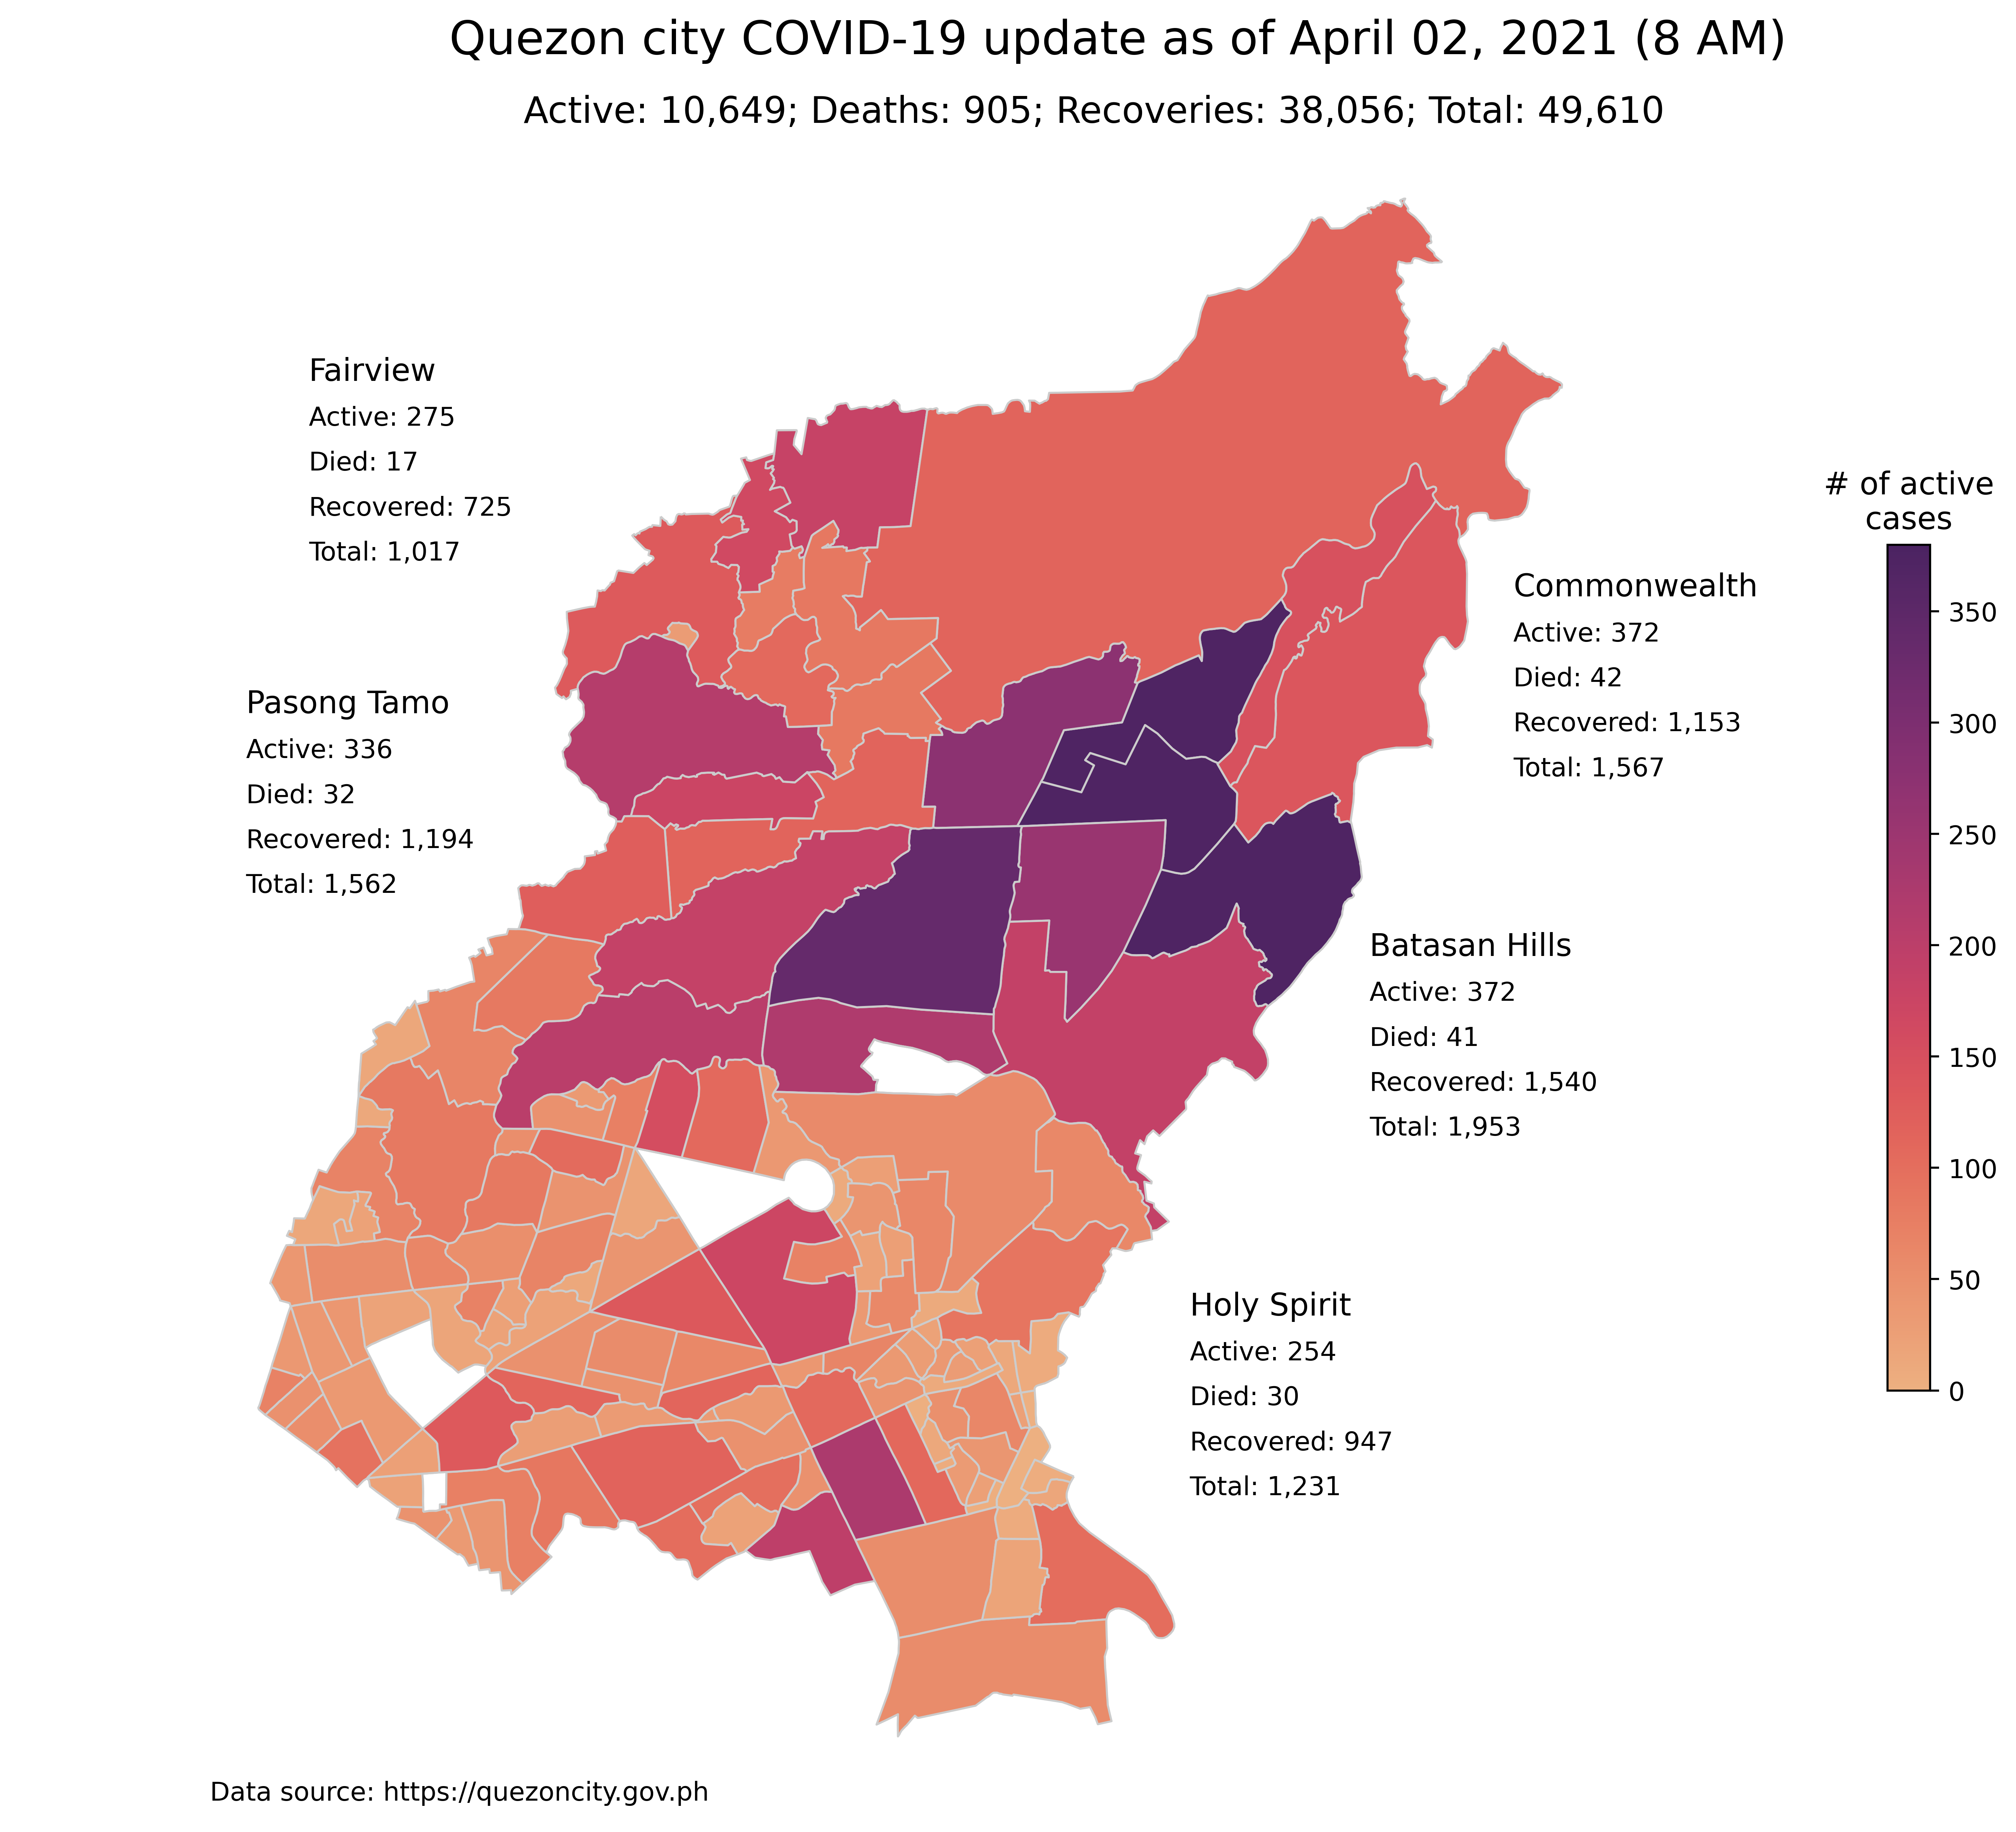

In [5]:
total_counts_file = '/Users/ginoasuncion/Projects/mapping_covid_cases/data/qc_covid_cases_per_day.csv'
output_dir = '/Users/ginoasuncion/Projects/mapping_covid_cases/output' # output directory to save

utils.create_map(preprocessed_data, downloaded_file, total_counts_file, vmax=380, 
           show_plot=True, save_fig=False, output_dir=None)

We can see here that cases are high in neighboring barangays such as Fairview, Pasong Tamo, Commonwealth, Batasan Hills, and Holy Spirit.

## Batch processing

Batch processes all the downloaded data based on the date range specified.

In [6]:
data_dir = '/Users/ginoasuncion/Projects/mapping_covid_cases/data'
shapefiles_location = '/Users/ginoasuncion/Projects/mapping_covid_cases/data/Barangays/Barangays.shp'
total_counts_file = '/Users/ginoasuncion/Projects/mapping_covid_cases/data/qc_covid_cases_per_day.csv'
output_dir = '/Users/ginoasuncion/Projects/mapping_covid_cases/output'

In [7]:
dt =[('April', 2)] # processes data from april 1 to april 2

utils.batch_process(dt, 380, data_dir, shapefiles_location, total_counts_file, output_dir)

## Dynamic visualization
This creates an animation on how the maps change with time.

In [8]:
fp_in = f"{output_dir}/*.png"
fp_out = f"{output_dir}/output.gif"

In [9]:
# creates gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs, save_all=True, duration=400, loop=0)

# creates mp4
clip = mp.VideoFileClip(f"{output_dir}/output.gif")
clip.write_videofile(f"{output_dir}/output.mp4")

t:   0%|          | 0/41 [00:00<?, ?it/s, now=None]

Moviepy - Building video /Users/ginoasuncion/Projects/mapping_covid_cases/output/output.mp4.
Moviepy - Writing video /Users/ginoasuncion/Projects/mapping_covid_cases/output/output.mp4



Moviepy - Done !
Moviepy - video ready /Users/ginoasuncion/Projects/mapping_covid_cases/output/output.mp4
